# LIBRARIES NEEDED IN THE STUDY

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier

from sklearn.pipeline import Pipeline
from sklearn import metrics

# Reading the Data

In [61]:
df = pd.read_csv("https://github.com/jahongirkb/air_company/blob/main/train_dataset.csv?raw=true")
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [20]:
nulls = df.isnull().sum()
nulls

id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             28
satisfaction                          0
dtype: int64

In [21]:
df.shape

(10000, 24)

In [22]:
df.duplicated().sum()

0

In [23]:
df.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [24]:
df['satisfaction'].value_counts()/len(df)*100

0    50.0
1    50.0
Name: satisfaction, dtype: float64

In [25]:
satisfaction_rate = df['satisfaction'].value_counts()/len(df)*100

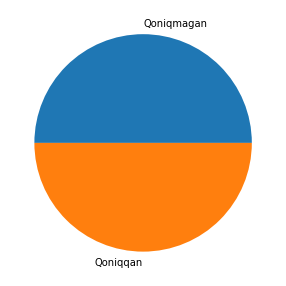

In [26]:
plt.figure(figsize=(5,5))
plt.pie(satisfaction_rate, labels=['Qoniqmagan','Qoniqqan'])
plt.show()

In [27]:
df.corrwith(df['satisfaction']).abs().sort_values(ascending=False)

satisfaction                         1.000000
Online boarding                      0.504986
Inflight entertainment               0.400900
Seat comfort                         0.342294
On-board service                     0.326426
Leg room service                     0.324368
Cleanliness                          0.310338
Flight Distance                      0.298703
Inflight wifi service                0.277395
Baggage handling                     0.247965
Inflight service                     0.240584
Checkin service                      0.232359
Food and drink                       0.207854
Ease of Online booking               0.164662
Age                                  0.144302
Departure/Arrival time convenient    0.067638
Arrival Delay in Minutes             0.048650
Departure Delay in Minutes           0.042960
Gate location                        0.007169
id                                   0.002931
dtype: float64

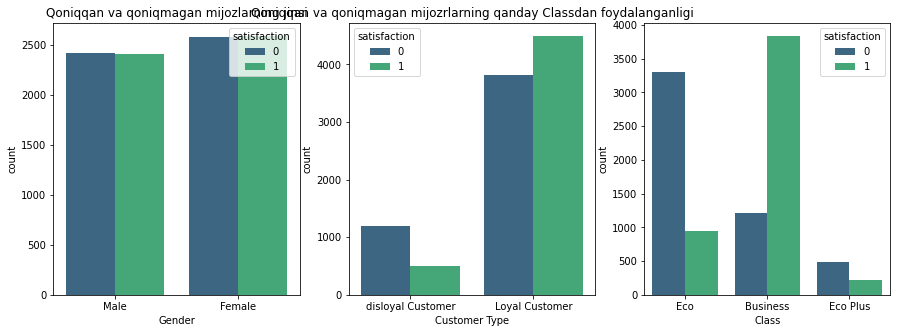

In [28]:
fig, axes = plt.subplots(1,3, figsize=(15,5))

sns.countplot(x='Gender', hue='satisfaction', palette='viridis', data=df, ax=axes[0])
axes[0].set_title("Qoniqqan va qoniqmagan mijozlarning jinsi")

sns.countplot(x='Customer Type', hue='satisfaction', palette='viridis', data=df, ax=axes[1])
axes[1].set_title("Qoniqqan va qoniqmagan mijozrlarning turi")

sns.countplot(x='Class', hue='satisfaction', palette='viridis', data=df, ax=axes[2])
axes[1].set_title("Qoniqqan va qoniqmagan mijozrlarning qanday Classdan foydalanganligi")

plt.show()

In [29]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=10)

X_train = train_set.drop(["satisfaction", 'id'], axis=1)
y = train_set["satisfaction"].copy()

X_num = X_train[["Age", 'Flight Distance', "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort",  "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Departure Delay in Minutes", "Arrival Delay in Minutes"]]

In [30]:
num_pipeline = Pipeline([
          ('imputer', SimpleImputer(strategy="most_frequent")),
          ('std_scaler', StandardScaler())             
])

In [31]:
num_attribs = ["Age", 'Flight Distance', "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort",  "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Departure Delay in Minutes", "Arrival Delay in Minutes"]
cat_attribs = ["Gender", "Customer Type", "Type of Travel", "Class"]

full_pipeline = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [32]:
X_prepared = full_pipeline.fit_transform(X_train)

In [33]:
X_prepared

array([[ 1.05262419,  0.57616813,  0.90200443, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.38130239, -0.22188024, -1.30226258, ...,  0.        ,
         1.        ,  0.        ],
       [-0.08862287, -0.73267042, -0.56750691, ...,  0.        ,
         1.        ,  0.        ],
       ...,
       [ 1.05262419, -0.2963909 ,  0.16724876, ...,  1.        ,
         0.        ,  0.        ],
       [-0.42428377,  0.49283384, -0.56750691, ...,  0.        ,
         1.        ,  0.        ],
       [-0.55854813,  1.17323381,  0.90200443, ...,  1.        ,
         0.        ,  0.        ]])

In [34]:
# Modelni yaratamiz (training)
LR_model = LogisticRegression()
LR_model.fit(X_prepared, y)

LogisticRegression()

In [35]:
X_test = test_set.drop(["satisfaction", 'id'], axis=1)
X_test

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
937,Male,Loyal Customer,40,Business travel,Business,3070,4,4,4,4,...,5,4,4,4,4,4,4,4,0,0.0
9355,Female,disloyal Customer,24,Business travel,Eco,895,4,4,4,2,...,4,4,5,3,5,3,2,4,25,13.0
2293,Female,Loyal Customer,44,Business travel,Business,3189,1,1,1,1,...,5,5,5,5,5,4,5,5,5,3.0
192,Female,disloyal Customer,19,Business travel,Eco,425,4,0,5,2,...,5,5,4,4,4,5,4,5,0,0.0
8675,Male,Loyal Customer,31,Business travel,Business,403,3,3,3,3,...,5,5,5,5,5,4,4,5,19,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5624,Female,Loyal Customer,60,Business travel,Eco,746,2,5,3,5,...,2,2,2,2,2,4,2,3,0,0.0
6005,Female,Loyal Customer,43,Business travel,Business,151,1,1,4,1,...,3,4,4,4,5,2,4,1,0,0.0
987,Female,Loyal Customer,43,Personal Travel,Eco,277,4,1,4,3,...,3,2,2,4,2,2,2,2,0,0.0
6152,Male,Loyal Customer,32,Business travel,Business,3456,5,5,5,5,...,4,4,5,2,5,4,5,4,5,0.0


In [36]:
y_test = test_set['satisfaction'].copy()
y_test

937     1
9355    1
2293    1
192     1
8675    1
       ..
5624    0
6005    1
987     0
6152    1
2092    0
Name: satisfaction, Length: 2000, dtype: int64

In [37]:
X_test_prepared = full_pipeline.transform(X_test)

              precision    recall  f1-score   support

           0       0.86      0.89      0.88       967
           1       0.90      0.87      0.88      1033

    accuracy                           0.88      2000
   macro avg       0.88      0.88      0.88      2000
weighted avg       0.88      0.88      0.88      2000

Model aniqligi: 0.8805


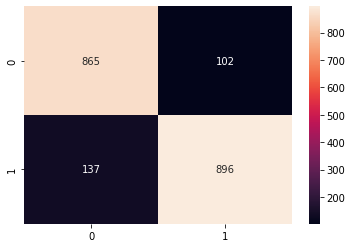

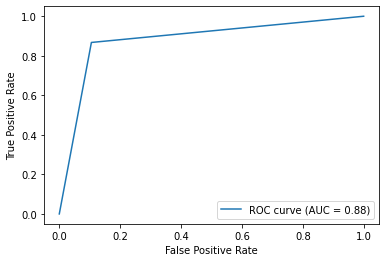

In [38]:
# Modelni baholaymiz
y_pred = LR_model.predict(X_test_prepared)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [39]:
svm_model = SVC()
svm_model.fit(X_prepared, y)

SVC()

              precision    recall  f1-score   support

           0       0.93      0.94      0.93       967
           1       0.94      0.93      0.94      1033

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqligi: 0.9345


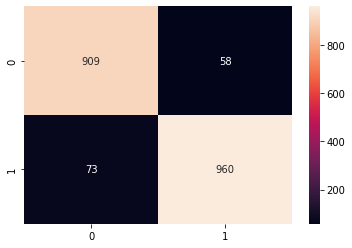

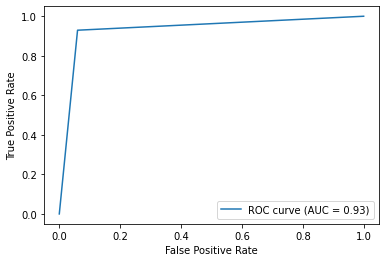

In [40]:
# Modelni baholaymiz
y_pred = svm_model.predict(X_test_prepared)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [41]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_prepared, y)

DecisionTreeClassifier()

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       967
           1       0.92      0.94      0.93      1033

    accuracy                           0.93      2000
   macro avg       0.93      0.93      0.93      2000
weighted avg       0.93      0.93      0.93      2000

Model aniqligi: 0.928


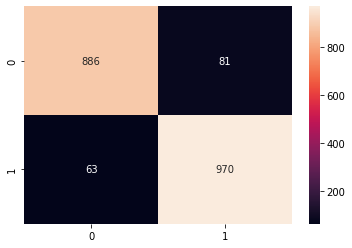

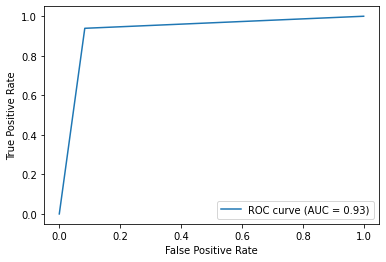

In [42]:
# Modelni baholaymiz
y_pred = tree_model.predict(X_test_prepared)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [43]:
RF_model = RandomForestClassifier(n_estimators=9)
RF_model.fit(X_prepared, y)

RandomForestClassifier(n_estimators=9)

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       967
           1       0.95      0.93      0.94      1033

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.94


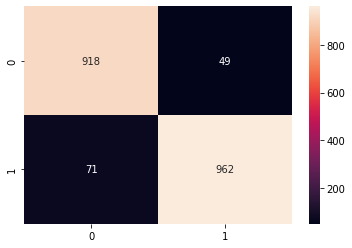

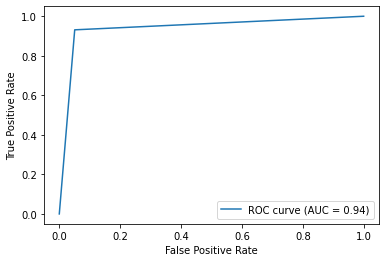

In [44]:
# Modelni baholaymiz
y_pred = RF_model.predict(X_test_prepared)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [45]:
xgb_model = XGBClassifier()
xgb_model.fit(X_prepared, y)

XGBClassifier()

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       967
           1       0.95      0.93      0.94      1033

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000

Model aniqligi: 0.9395


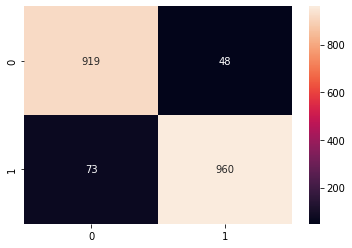

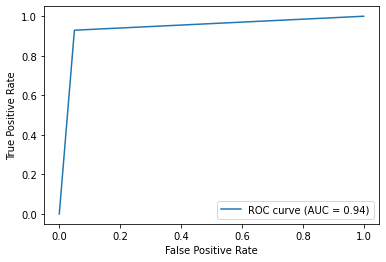

In [46]:
# Modelni baholaymiz
y_pred = xgb_model.predict(X_test_prepared)
print(metrics.classification_report(y_test, y_pred))
print("Model aniqligi:", metrics.accuracy_score(y_test,y_pred))

## confusion matrix
conf_mat = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [62]:
df_test = pd.read_csv("https://github.com/jahongirkb/air_company/blob/main/test_dataset.csv?raw=true")
df_test.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,1,Female,Loyal Customer,25,Personal Travel,Eco,2704,2,2,2,...,5,2,4,4,3,5,1,5,152,191.0
1,2,Female,Loyal Customer,49,Business travel,Business,1623,1,1,1,...,4,2,2,2,2,4,2,3,60,52.0
2,3,Male,Loyal Customer,51,Business travel,Business,338,4,4,4,...,5,5,5,5,5,4,5,4,0,0.0
3,4,Male,Loyal Customer,34,Business travel,Eco Plus,95,0,0,0,...,1,5,4,4,1,3,3,5,0,0.0
4,5,Male,Loyal Customer,34,Personal Travel,Eco,602,4,4,4,...,5,5,4,5,4,5,5,5,130,140.0


In [48]:
df_test.shape

(4000, 23)

In [49]:
df_test = df_test.drop('id',  axis=1)

In [50]:
df_test_prepared = full_pipeline.transform(df_test)

In [51]:
df_predicted = RF_model.predict(df_test_prepared)

In [52]:
df_predicted.shape

(4000,)

In [63]:
df_sample = pd.read_csv("https://github.com/jahongirkb/air_company/blob/main/sample_submission.csv?raw=true")
df_sample.head()

,id,satisfaction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [54]:
df_sample.shape

(4000, 2)

In [55]:
df_sample['satisfaction'] = df_predicted

In [56]:
df_sample.head()

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0


In [57]:
df_sample.to_csv("my_submission.csv", index=False)

In [58]:
df_sub = pd.read_csv("/content/my_submission.csv")
df_sub.head()

,id,satisfaction
0,1,0
1,2,1
2,3,1
3,4,1
4,5,0
